In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_pyber_df = pd.merge(ride_data, city_data,how='outer', on='city')
# Display the data table for preview
combined_pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# example of count for type by city
# combined_pyber_df[combined_pyber_df['type']=='Rural'].groupby("city").count()

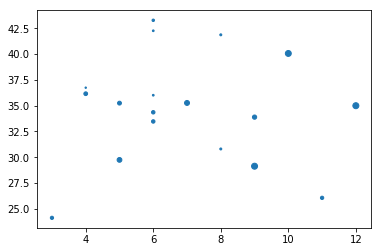

In [3]:
# Obtain the x and y coordinates for each of the three city types
#Rural DF and Scatter - comparing mean fare as Y by ride_id count as X
rural_df = combined_pyber_df[combined_pyber_df['type']=='Rural'].groupby(["city", "type"]).agg({
    "fare": "mean","ride_id":"count","driver_count":"sum"
}).reset_index()
driver_count_r=rural_df["driver_count"]

y_axis_rural = rural_df["fare"]
x_axis_rural = rural_df["ride_id"]
rural_scatter = plt.scatter(x_axis_rural, y_axis_rural,s=driver_count_r*.5)
rural_scatter

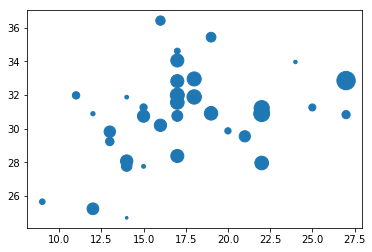

In [4]:
#Suburban DF and Scatter
sub_df=combined_pyber_df[combined_pyber_df['type']=='Suburban'].groupby(["city", "type"]).agg({
    "fare": "mean", "ride_id":"count","driver_count":"sum"
}).reset_index()
driver_count_s=sub_df["driver_count"]

y_axis_sub = sub_df["fare"]
x_axis_sub = sub_df["ride_id"]
sub_scatter = plt.scatter(x_axis_sub, y_axis_sub,s=driver_count_s*.5)

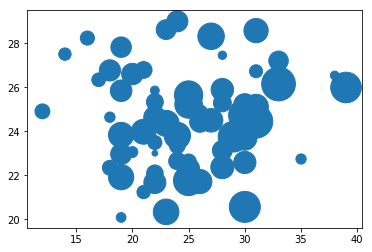

In [5]:
#Urban DF and Scatter
urban_df = combined_pyber_df[combined_pyber_df['type']=="Urban"].groupby(["city","type"]).agg({
    "fare":"mean","ride_id":"count","driver_count":"sum"
}).reset_index()
driver_count_u=urban_df["driver_count"]

y_axis_urban = urban_df["fare"]
x_axis_urban = urban_df["ride_id"]
urban_scatter = plt.scatter(x_axis_urban, y_axis_urban,s=driver_count_u*.5)
urban_scatter

In [6]:
# Obtain the x and y coordinates for each of the three city types
#x_axis_rural
#y_axis_rural
#x_axis_sub
#y_axis_sub
#x_axis_urban
#y_axis_urban

# Build the scatter plots for each city types (above - referenced here)
#rural_scatter
#sub_scatter
#urban_scatter

In [7]:
# driver_count = combined_pyber_df["driver_count"].groupby(combined_pyber_df["city"]).sum()
# driver_count.head()

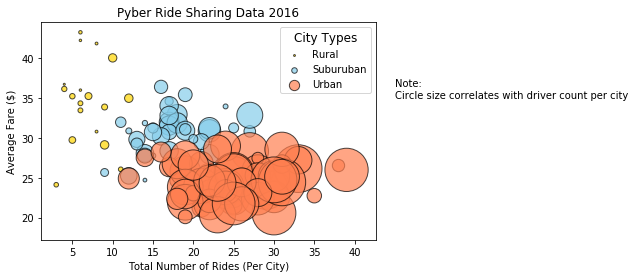

In [8]:
#Scatter Plots
plt.scatter(x_axis_rural,y_axis_rural,color='#ffd700',alpha=0.7,s=driver_count_r*1,label='Rural',edgecolors='black')
plt.scatter(x_axis_sub,y_axis_sub,color='#87ceeb',alpha=0.7,s=driver_count_s*1,label='Suburuban',edgecolors='black')
plt.scatter(x_axis_urban,y_axis_urban,color='#ff7f50',alpha=0.7,s=driver_count_u*1,label='Urban',edgecolors='black')

#Create Titles and x,y Labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data 2016')


# Create a legend 
plt.legend(loc='upper right',title='City Types',title_fontsize=12,markerscale=.3)
#     type_scatter = plt.scatter(x_val,y_val,s=driver_count_grouped*10,alpha=0.5)

# Incorporate a text label regarding circle size
plt.text(45,35,f"""Note:
Circle size correlates with driver count per city""")
# Save Figure
plt.savefig("../pyber_scatter.png")
plt.show()

## Total Fares by City Type

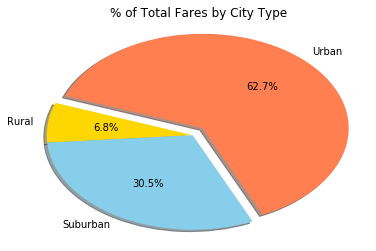

In [13]:
# Calculate Type Percents
#total for denominator
total_fare_count = combined_pyber_df["type"].count()
#rural fare count
rural_fare = combined_pyber_df[combined_pyber_df['type']=="Rural"].agg({
    "fare":"sum"
})
#convert into percentage
rural_percent = float((rural_fare/total_fare_count)*100)
#suburban fare count
sub_fare = combined_pyber_df[combined_pyber_df['type']=="Suburban"].agg({
    "fare":"sum"
})
#convert into percentage
sub_percent = float((sub_fare/total_fare_count)*100)
#urban fare count
urban_fare = combined_pyber_df[combined_pyber_df['type']=="Urban"].agg({
    "fare":"sum"
})
#convert into percentage
urban_percent = float((urban_fare/total_fare_count)*100)
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
values = [rural_percent, sub_percent, urban_percent]
colors = ['#ffd700','#87ceeb','#ff7f50']
explode = (0,0,.1)
plt.pie(values, labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,explode=explode,startangle=160)
plt.title("% of Total Fares by City Type")
plt.axis('auto')
# Save Figure
plt.savefig("../fare_pie.png")
#Show Figure
plt.show()

## Total Rides by City Type

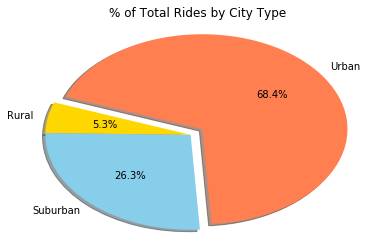

In [14]:
# Calculate Ride Percents
#total for denominator
total_ride_count = combined_pyber_df["ride_id"].count()
#rural ride count
rural_ride = combined_pyber_df[combined_pyber_df['type']=="Rural"].agg({
    "ride_id":"count"
})
#convert into percentage
rural_percent_ride = float((rural_ride/total_ride_count)*100)
#suburban ride count
sub_ride = combined_pyber_df[combined_pyber_df['type']=="Suburban"].agg({
    "ride_id":"count"
})
#convert into percentage
sub_percent_ride = float((sub_ride/total_ride_count)*100)
#urban ride count
urban_ride = combined_pyber_df[combined_pyber_df['type']=="Urban"].agg({
    "ride_id":"count"
})
#convert into percentage
urban_percent_ride = float((urban_ride/total_ride_count)*100)

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
values = [rural_percent_ride, sub_percent_ride, urban_percent_ride]
colors = ['#ffd700','#87ceeb','#ff7f50']
explode = (0,0,.1)
plt.pie(values, labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,explode=explode,startangle=160)
plt.title("% of Total Rides by City Type")
plt.axis('auto')
# Save Figure
plt.savefig("../rides_pie.png")
#Show Figure
plt.show()

## Total Drivers by City Type

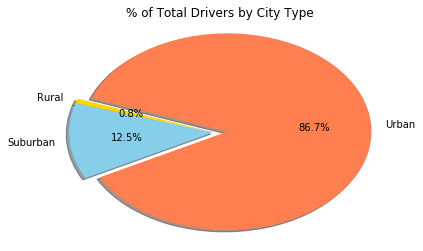

In [15]:
# Calculate Ride Percents
#total for denominator
total_driver_count = combined_pyber_df["driver_count"].count()
#rural driver count
rural_driver = combined_pyber_df[combined_pyber_df['type']=="Rural"].agg({
    "driver_count":"sum"
})
#convert into percentage
rural_percent_driver = float((rural_driver/total_driver_count)*100)
#suburban ride count
sub_driver = combined_pyber_df[combined_pyber_df['type']=="Suburban"].agg({
    "driver_count":"sum"
})
#convert into percentage
sub_percent_driver = float((sub_driver/total_driver_count)*100)
#urban ride count
urban_driver = combined_pyber_df[combined_pyber_df['type']=="Urban"].agg({
    "driver_count":"sum"
})
#convert into percentage
urban_percent_driver = float((urban_driver/total_driver_count)*100)

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
values = [rural_percent_driver, sub_percent_driver, urban_percent_driver]
colors = ['#ffd700','#87ceeb','#ff7f50']
explode = (0,0,.1)
plt.pie(values, labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,explode=explode,startangle=160)
plt.title("% of Total Drivers by City Type")
plt.axis('auto')
# Save Figure
plt.savefig("../drivers_pie.png")
#Show Figure
plt.show()